In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('twitch_log.tsv', sep='\t', header=None)
df.tail()

,0,1,2,3,4
297027,야호ㆍ_ㆍ (yaho_vlup),🍹밥먹으면서 마크🌴,시청자 194명,Minecraft,2022-10-18 13:00:04.669274
297028,앙쥬8ㅁ8 (angjyu_xd),러씨아에선 냉동 '고기'를 선호합니다 in 러씨아,시청자 189명,Project Zomboid,2022-10-18 13:00:04.669274
297029,거터 (gutterlife),역병 이야기 A Plague Tale: Requiem,시청자 184명,A Plague Tale: Requiem,2022-10-18 13:00:04.669274
297030,분석왕봉달이 (gbmhades),초록괴물 -500해라 진짜 그거하면 누가몬올림,시청자 182명,Teamfight Tactics,2022-10-18 13:00:04.669274
297031,HaruNuna,🐟이 누난 목소린 예쁜데 왜..🐟??,시청자 181명,Lost Ark,2022-10-18 13:00:04.669274


In [3]:
df.columns = ['이름', '제목','시청자수','카테고리','일시']

### 시청자수 전처리

In [4]:
df['시청자수'] = df['시청자수'].str.replace('시청자 ', '')
df['시청자수'] = df['시청자수'].str.replace('명', '')
df['시청자수'] = df['시청자수'].str.replace(',', '')
df.head()

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:02:22.436272
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
2,비챤_ (viichan6),6시) VRC 풀트뱅 ~!,9491,VRChat,2022-09-27 19:02:22.436272
3,한동숙 (handongsuk),발낳대 스크림,8103,VALORANT,2022-09-27 19:02:22.436272
4,괴물쥐123 (tmxk319),발낳대 전 스크림,8098,VALORANT,2022-09-27 19:02:22.436272


In [5]:
df1 = df[df['시청자수'].str.find('만') > 0]
df1

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:02:22.436272
49,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:05:04.699268
50,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),1만,Just Chatting,2022-09-27 19:05:04.699268
98,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:10:04.966996
99,한동숙 (handongsuk),발낳대 스크림,1만,VALORANT,2022-09-27 19:10:04.966996
...,...,...,...,...,...
293082,랄로 (aba4647),메운디 못깨면 오늘 집에안간다,1.1만,StarCraft,2022-10-18 06:30:05.524318
293132,랄로 (aba4647),메운디 못깨면 오늘 집에안간다,1.1만,StarCraft,2022-10-18 06:35:05.669796
293182,랄로 (aba4647),오크 글레디에이터,1만,Warcraft III,2022-10-18 06:40:05.024460
293232,랄로 (aba4647),오크 글레디에이터,1만,Warcraft III,2022-10-18 06:45:04.627878


In [6]:
df2 = df1['시청자수'].str.replace('만', '').astype(float)*10000 + 500
df2

0         14500.0
49        14500.0
50        10500.0
98        14500.0
99        10500.0
           ...   
293082    11500.0
293132    11500.0
293182    10500.0
293232    10500.0
293332    10500.0
Name: 시청자수, Length: 8796, dtype: float64

In [7]:
df3 = df['시청자수']
df3 = df3.str.replace(',', '')
# # df[df3.str.find('L')>1]
# df3.iloc[:6687]
# df.iloc[6680:6690]

In [8]:
df.loc[df2.index, '시청자수'] = df2

In [9]:
# df.drop(6684, inplace=True)
df.drop(7190, inplace=True)

In [11]:
df.drop(df[df['시청자수'] == 'League of Legends'].index, inplace=True)
df.drop(df[df['시청자수'].isnull()].index, inplace=True)

In [11]:
df['시청자수'].iloc[7190:7200].astype(float)
df['시청자수']

0         14500.0
1            9687
2            9491
3            8103
4            8098
           ...   
210192        207
210193        206
210194        204
210195        198
210196        195
Name: 시청자수, Length: 210175, dtype: object

In [12]:
df['시청자수'] = df['시청자수'].astype(int)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297010 entries, 0 to 297031
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   이름      297010 non-null  object
 1   제목      297010 non-null  object
 2   시청자수    297010 non-null  int32 
 3   카테고리    297010 non-null  object
 4   일시      297010 non-null  object
dtypes: int32(1), object(4)
memory usage: 12.5+ MB


In [14]:
df.head()

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,14500,FIFA 23,2022-09-27 19:02:22.436272
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
2,비챤_ (viichan6),6시) VRC 풀트뱅 ~!,9491,VRChat,2022-09-27 19:02:22.436272
3,한동숙 (handongsuk),발낳대 스크림,8103,VALORANT,2022-09-27 19:02:22.436272
4,괴물쥐123 (tmxk319),발낳대 전 스크림,8098,VALORANT,2022-09-27 19:02:22.436272


In [15]:
df1 = df

In [17]:
name = df1.groupby('이름').mean().sort_values('시청자수', ascending=False)[:20]
name

,시청자수
이름,
LCK_Korea,40180.104869
우왁굳 (woowakgood),16677.908921
풍월량 (hanryang1125),15409.270134
enchantenter,15408.673152
한동숙 (handongsuk),14779.556931
아이네_ (vo_ine),12623.647166
랄로 (aba4647),11591.177986
릴파_ (lilpaaaaaa),10963.818991
침착맨 (zilioner),10363.231760


In [18]:
df2 = df1.set_index('이름')
df3 = df2.loc[name.index]
df3

,제목,시청자수,카테고리,일시
이름,,,,
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:00:05.647274
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:05:05.461526
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:10:05.154451
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:15:05.314280
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:20:07.268227
...,...,...,...,...
한갱 (woohankyung),옵치 잘 하고싶어요 ㅠㅠ제에발~~!!!!!!!!!,3287,Overwatch 2,2022-10-17 06:25:04.759173
한갱 (woohankyung),옵치 잘 하고싶어요 ㅠㅠ제에발~~!!!!!!!!!,3430,Overwatch 2,2022-10-17 06:30:05.297525
한갱 (woohankyung),옵치 잘 하고싶어요 ㅠㅠ제에발~~!!!!!!!!!,3191,Overwatch 2,2022-10-17 06:35:04.766529


In [19]:
df3.index

Index(['LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea',
       'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea',
       ...
       '한갱 (woohankyung)', '한갱 (woohankyung)', '한갱 (woohankyung)',
       '한갱 (woohankyung)', '한갱 (woohankyung)', '한갱 (woohankyung)',
       '한갱 (woohankyung)', '한갱 (woohankyung)', '한갱 (woohankyung)',
       '한갱 (woohankyung)'],
      dtype='object', name='이름', length=17400)

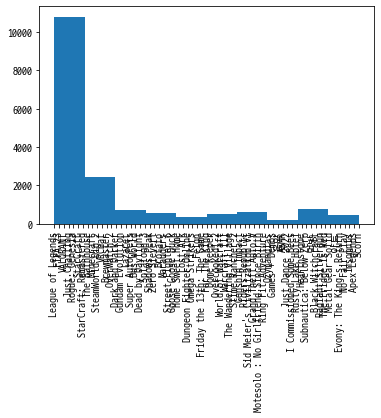

In [20]:
import matplotlib.pyplot as plt
# 한글 처리
from matplotlib import rc
rc('font', family='D2Coding')

plt.xticks(rotation="vertical")
plt.hist(df3['카테고리'])
plt.show()

In [21]:
df_p = df[df['이름']=='풍월량 (hanryang1125)']
df_p

,이름,제목,시청자수,카테고리,일시
919,풍월량 (hanryang1125),풍월량,1370,Just Chatting,2022-09-27 20:30:06.475437
968,풍월량 (hanryang1125),풍월량,1487,Just Chatting,2022-09-27 20:35:04.698807
995,풍월량 (hanryang1125),풍월량,5337,Just Chatting,2022-09-27 20:40:04.733223
1045,풍월량 (hanryang1125),풍월량,6279,Just Chatting,2022-09-27 20:45:05.376154
1093,풍월량 (hanryang1125),풍월량,7055,Just Chatting,2022-09-27 20:50:04.643354
...,...,...,...,...,...
191154,풍월량 (hanryang1125),오버워치2 풍월량,10500,Overwatch 2,2022-10-11 04:40:05.393820
191204,풍월량 (hanryang1125),오버워치2 풍월량,11500,Overwatch 2,2022-10-11 04:45:05.031340
191254,풍월량 (hanryang1125),오버워치2 풍월량,10500,Overwatch 2,2022-10-11 04:50:05.574218
191304,풍월량 (hanryang1125),오버워치2 풍월량,10500,Overwatch 2,2022-10-11 04:55:05.175608


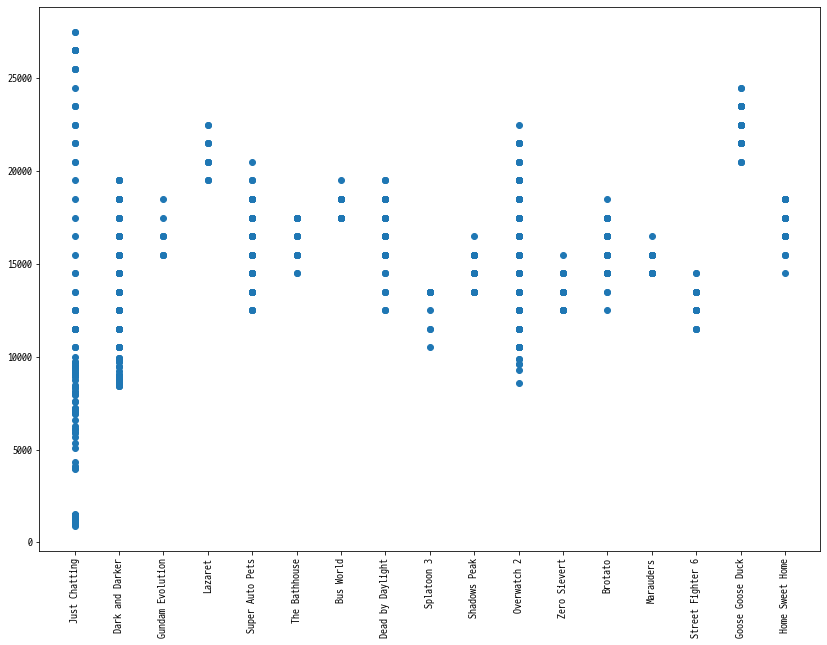

In [24]:
plt.figure(figsize=(14,10))
plt.xticks(rotation="vertical")
plt.scatter(df_p['카테고리'], df_p['시청자수'])

(array([250.,  24., 102.,  63.,  89.,  72., 327.,  72.,  76., 117.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

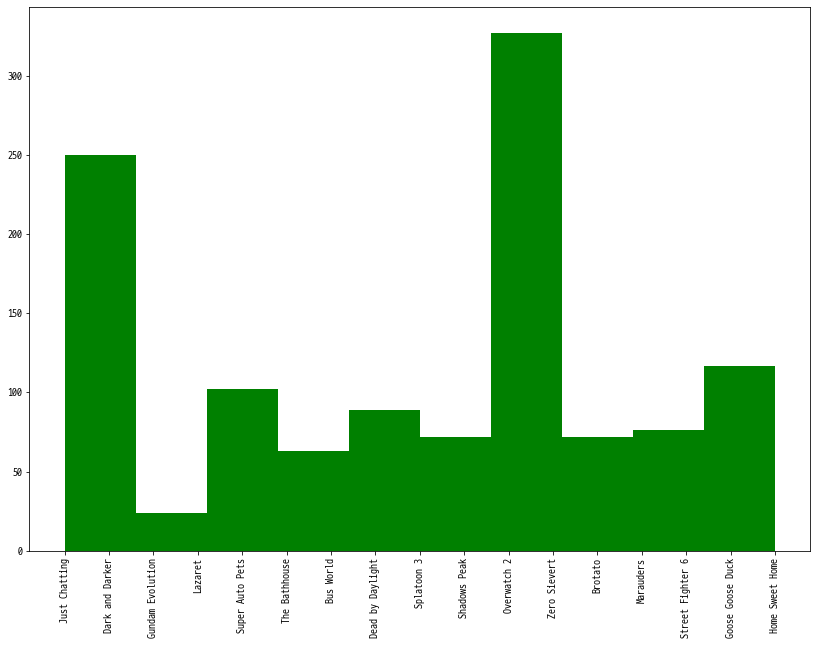

In [40]:
plt.figure(figsize=(14,10))
plt.xticks(rotation='vertical')
plt.hist(df_p['카테고리'], color='g' )

In [41]:
df_p['카테고리'].value_counts()

Overwatch 2         303
Dark and Darker     139
Just Chatting       111
Super Auto Pets     102
Dead by Daylight     89
Brotato              72
Goose Goose Duck     62
Home Sweet Home      55
Marauders            53
Shadows Peak         43
Bus World            36
Splatoon 3           29
The Bathhouse        27
Zero Sievert         24
Street Fighter 6     23
Lazaret              14
Gundam Evolution     10
Name: 카테고리, dtype: int64

### 시간대별로 집계할 수 있도록 전처리하자